<a href="https://colab.research.google.com/github/Farah14-lab/PCVK_Genap_2023/blob/main/UAS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bacterial Leaf Blight using CNN Method


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from skimage import io
import os
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Transformasi Inverse Color**

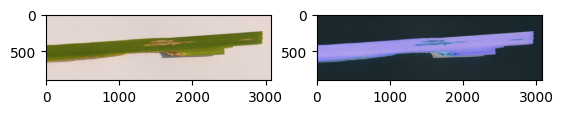

In [3]:
img = cv.imread('/content/drive/MyDrive/Images/Rice Leaf Disease/Bacterial leaf blight/DSC_0365.JPG')
img_asli = cv.cvtColor(img,cv.COLOR_BGR2RGB) # Konversi channel BGR -> RGB

img_inverse = 255 - img_asli

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(img_inverse)

**Transformasi Grayscale menggunakan Metode Averaging, Lightness, dan Luminance**

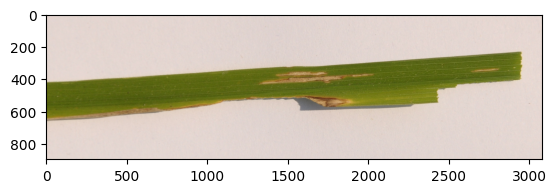

In [4]:
img = cv.imread('/content/drive/MyDrive/Images/Rice Leaf Disease/Bacterial leaf blight/DSC_0365.JPG')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

**Metode Averaging**

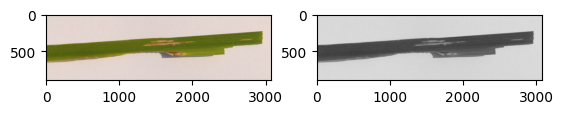

In [5]:
img_avg = cv.imread('/content/drive/MyDrive/Images/Rice Leaf Disease/Bacterial leaf blight/DSC_0365.JPG')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

**Metode Lightness**

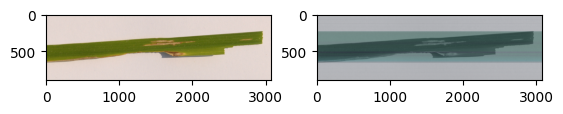

In [6]:
img_light = cv.imread('/content/drive/MyDrive/Images/Rice Leaf Disease/Bacterial leaf blight/DSC_0365.JPG')
img_light[:] = np.max(img_light,axis=-1, keepdims=100)/2 + np.min(img_light,axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

**Metode Luminance**

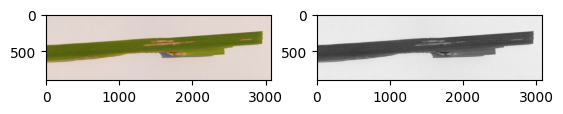

In [7]:
img_lum = cv.imread('/content/drive/MyDrive/Images/Rice Leaf Disease/Bacterial leaf blight/DSC_0365.JPG')
R, G, B = img_lum[:,:,0], img_lum[:,:,1], img_lum[:,:,2]
gray_img_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap='gray')

**Image Masking**

<BarContainer object of 256 artists>

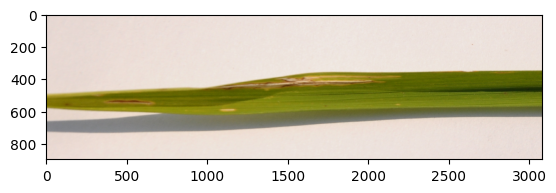

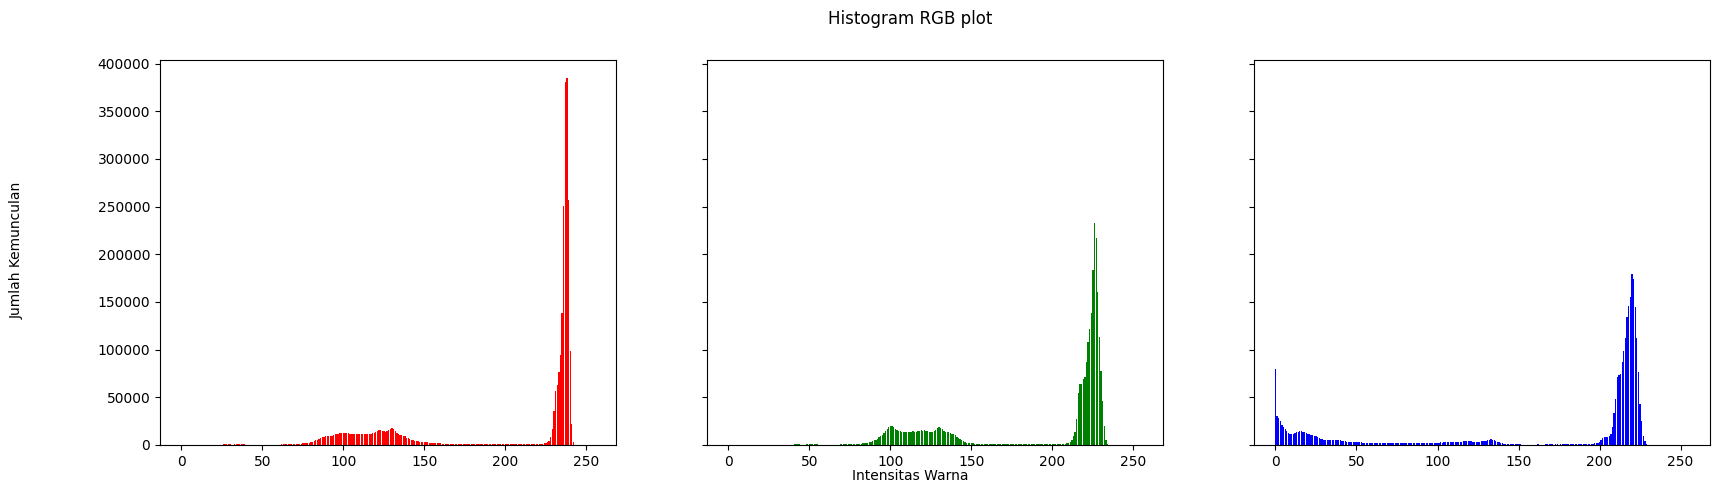

In [9]:
img_1 = cv.imread('/content/drive/MyDrive/Images/Rice Leaf Disease/Bacterial leaf blight/DSC_0376.JPG')
height, width, depth = np.shape(img_1)
names = np.arange(256)
img_rgb = cv.cvtColor(img_1,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)
blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img_1[y][x][0]] += 1
    green[img_1[y][x][1]] += 1
    red[img_1[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


**Contour Image**


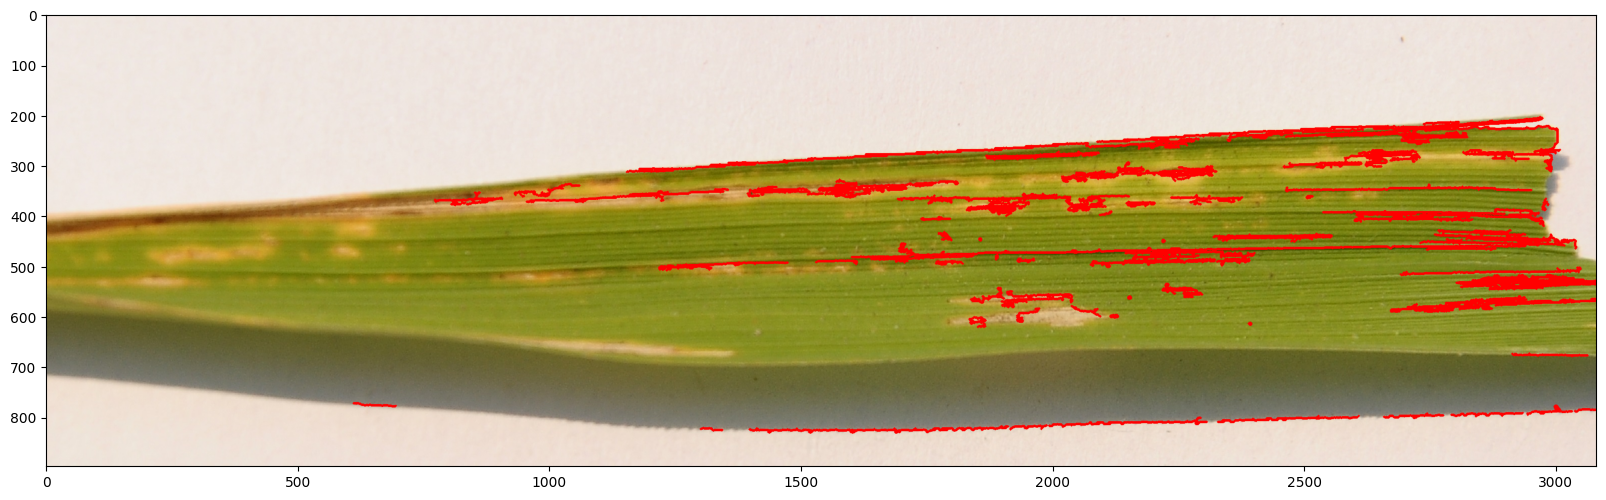

In [10]:
# Memuat citra dan mengkonversinya ke grayscale
img = cv.imread('/content/drive/MyDrive/Images/Rice Leaf Disease/Bacterial leaf blight/DSC_0374.JPG') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Mengaplikasikan Canny edge detection
edged = cv.Canny(img_gray, 30, 200)

# Mencari kontur pada citra hasil Canny
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Menggambar kontur pada citra asli
cv.drawContours(img, contours, -1, (0,0,255), 3)

# Menampilkan citra asli beserta kontur
plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [11]:
input_shape = (224, 224)
num_classes = 3

In [12]:
# Menyiapkan data training dan label
train_images = []
train_labels = []

In [13]:
dataset_path = '/content/drive/MyDrive/Images/Rice Leaf Disease'

In [14]:
# Mengambil citra dan label dari setiap kelas penyakit daun padi
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
for i, class_name in enumerate(class_names):
    class_folder_path = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_folder_path)
    
    for image_file in image_files:
        image_path = os.path.join(class_folder_path, image_file)
        image = cv.imread(image_path)
        image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        resized_image = cv.resize(image_gray, input_shape)
        
        train_images.append(resized_image)
        train_labels.append(i)  # Label sesuai dengan indeks kelas

In [15]:
# Mengubah data training menjadi bentuk array numpy
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Melakukan one-hot encoding pada label
train_labels_encoded = np.eye(num_classes)[train_labels]

# Normalisasi data gambar
train_images_normalized = train_images / 255.0

# Mengubah dimensi data gambar untuk kompatibilitas dengan model CNN
train_images_reshaped = np.expand_dims(train_images_normalized, axis=-1)


In [16]:
# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape+(1,)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Mengkompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(train_images_reshaped, train_labels_encoded, epochs=10, batch_size=32)

# Menyimpan model yang sudah di training ke dalam file model.h5
model.save('/content/drive/MyDrive/Images/Rice Leaf Disease/model.h5')
print("Model saved")


Epoch 1/10
4/4 [==============================] - 14s 3s/step - loss: 1.4611 - accuracy: 0.3000
Epoch 2/10
4/4 [==============================] - 12s 3s/step - loss: 1.0990 - accuracy: 0.3667
Epoch 3/10
4/4 [==============================] - 13s 3s/step - loss: 1.0905 - accuracy: 0.3917
Epoch 4/10
4/4 [==============================] - 12s 3s/step - loss: 1.1087 - accuracy: 0.3417
Epoch 5/10
4/4 [==============================] - 10s 2s/step - loss: 1.0413 - accuracy: 0.5833
Epoch 6/10
4/4 [==============================] - 12s 2s/step - loss: 0.9650 - accuracy: 0.4917
Epoch 7/10
4/4 [==============================] - 12s 3s/step - loss: 1.0524 - accuracy: 0.4500
Epoch 8/10
4/4 [==============================] - 12s 3s/step - loss: 0.8255 - accuracy: 0.6750
Epoch 9/10
4/4 [==============================] - 12s 3s/step - loss: 0.7781 - accuracy: 0.6833
Epoch 10/10
4/4 [==============================] - 10s 3s/step - loss: 0.7215 - accuracy: 0.6667
Model saved


In [17]:
# Mengklasifikasikan citra digital dengan model yang telah dilatih
img_path = '/content/drive/MyDrive/Images/Rice Leaf Disease/Bacterial leaf blight/DSC_0365.JPG'
img = cv.imread(img_path)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
resized_img = cv.resize(img_gray, input_shape)
normalized_img = resized_img / 255.0
reshaped_img = np.expand_dims(normalized_img, axis=-1)
input_img = np.expand_dims(reshaped_img, axis=0)

predictions = model.predict(input_img)
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 214ms/step
Predicted class: Bacterial leaf blight


1/1 [==============================] - 0s 66ms/step
Predicted class: Leaf smut


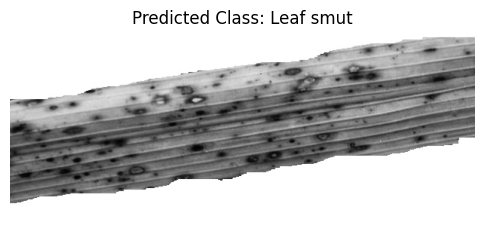

1/1 [==============================] - 0s 67ms/step
Predicted class for DSC_0373.JPG: Bacterial leaf blight


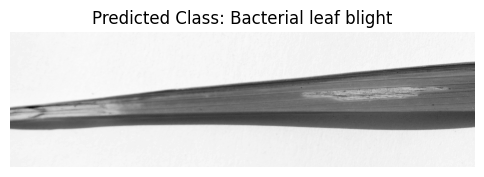

1/1 [==============================] - 0s 70ms/step
Predicted class for DSC_0292.JPG: Brown spot


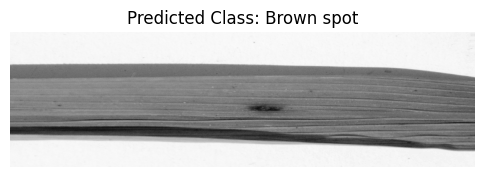

1/1 [==============================] - 0s 79ms/step
Predicted class for DSC_0331.JPG: Leaf smut


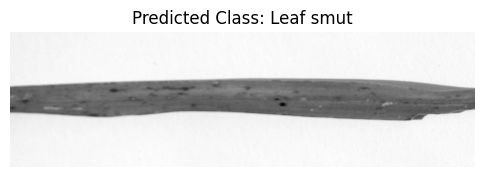

In [18]:
# Mengklasifikasikan citra digital dengan model yang telah dilatih
img_path = '/content/drive/MyDrive/Images/Rice Leaf Disease/Brown spot/DSC_0101.jpg'
img = cv.imread(img_path)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
resized_img = cv.resize(img_gray, input_shape)
normalized_img = resized_img / 255.0
reshaped_img = np.expand_dims(normalized_img, axis=-1)
input_img = np.expand_dims(reshaped_img, axis=0)

predictions = model.predict(input_img)
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)

# Menampilkan citra digital
plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.title("Predicted Class: " + predicted_class)
plt.axis('off')
plt.show()

# Mengklasifikasikan citra digital untuk setiap kelas
class_paths = [
    '/content/drive/MyDrive/Images/Rice Leaf Disease/Bacterial leaf blight',
    '/content/drive/MyDrive/Images/Rice Leaf Disease/Brown spot',
    '/content/drive/MyDrive/Images/Rice Leaf Disease/Leaf smut'
]

for class_path in class_paths:
    image_files = os.listdir(class_path)
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(class_path, random_image_file)

    img = cv.imread(random_image_path)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    resized_img = cv.resize(img_gray, input_shape)
    normalized_img = resized_img / 255.0
    reshaped_img = np.expand_dims(normalized_img, axis=-1)
    input_img = np.expand_dims(reshaped_img, axis=0)

    predictions = model.predict(input_img)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]

    print("Predicted class for", random_image_file + ":", predicted_class)

    # Menampilkan citra digital
    plt.figure(figsize=(6, 6))
    plt.imshow(img_gray, cmap='gray')
    plt.title("Predicted Class: " + predicted_class)
    plt.axis('off')
    plt.show()